# Statistics

Today, we will continue our discussion of data exploration, and look for variables which co-occur together (*correlated variables*).

# Table of contents
[1. Data Exploration and Statistics](#1.-Data-Exploration-and-Statistics)
- mean, meadian, standard deviation
- correlation and causation

[2. Correlation](#1.-Correlation)

# 1. Data Exploration and Statistics

Our dataset is enormous - it is difficult to understand the data we have available just by looking at the Data Frame. 

Data Scientists and AI researchers start every project with *data exploration* - plotting and summarizing various attributes of the data to get a better idea of what the data looks like.

We learned a lot of useful ways to visualize data yesterday. Today, we will continue learning about data exploration.

We'll start by examining


In [ ]:
# First, we import the libraries we will use in this notebook and load the Fragile Families data. 
# The first line sets maplotlib plots to show inside the notebook.
%matplotlib inline 
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import sys
sys.path.append('..')
import ff

# Read in data
background = "../../ai4all_data/background.csv"
train = "../../ai4all_data/train.csv"

# Read in data
data_frame = pd.read_csv(background, low_memory=False)
data_frame = data_frame.set_index('challengeID')

In [8]:
# we saved the functions we learned yesterday in a separate file, called "ff_functions.py"
# We can now import this file and call functions without copying them here
import ff_functions as helper

#data_frame.head()
#outcome.head()

## Mean and Median

In [29]:
income_yr9 = data_frame["m5j1"]
income_yr9 = helper.remove_nan(income_yr9)
income_yr9 = helper.select_above_zero(income_yr9)

//anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


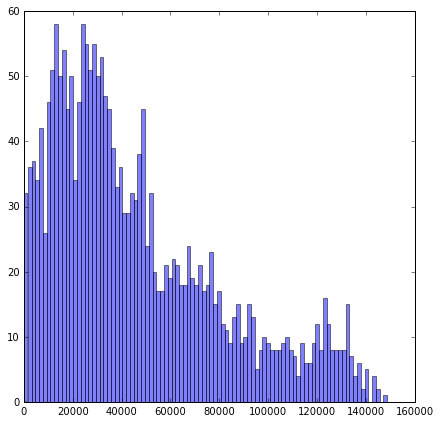

In [30]:
helper.plot_one_histogram(income_yr9)

You can see that most families are concentrated between 20,000 and 40,000, but some go as far as 140,000. 

### Question: What do you think the mean and median will be?
### Answer:

In [31]:
# We can use the pandas mean and median functions to calculate the values.
income_yr1.mean()

46200.43102127248

### Question: Is this value reflective of the distribution of wages you see above? Why/Why not?
### Answer:

In [32]:
income_yr1.median()

35935.2678838875

### Question: Is this value reflective of the distribution of wages you see above? Why/Why not?
### Answer:

One of the most common mistakes in data science is trusting the mean value too much. It is a mistake often made when reporting typical incomes in a country. Reporting a mean value averages out many lower earners and fewer higher earners and produces an unrepresentative in-between value. 
Often, knowing the median can help us get a better idea of what is a "typical", or most common, wage.

## Standard Deviation
Standard deviation is a measure that is used to quantify the amount of variation or dispersion of a set of data values. Together with the mean and median, it can help us quantify the distribution of the data.

Low standard deviation means all values lie relatively close to the mean. High standard deviation means many values lie very far away from the mean.

In [28]:
income_yr1.std()

34938.49467182776

### Question: What does this standard deviation value mean?
### Answer:

## Outliers
However well we define our data, there may always be examples unlike any others. We call those "outliers".

## Example of an outlier

# 2. Correlation
Recall the examples of two scatterplots from yesterday: The year 1 vs year 9 and year 1 vs year 3 income:

//anaconda/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


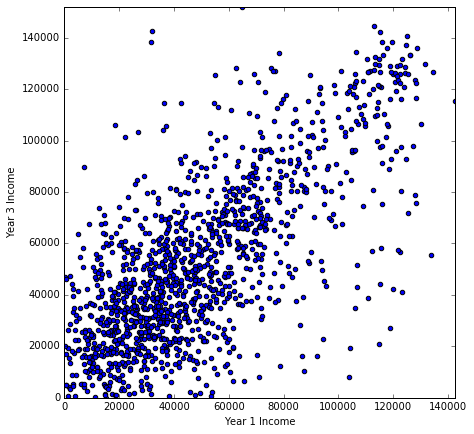

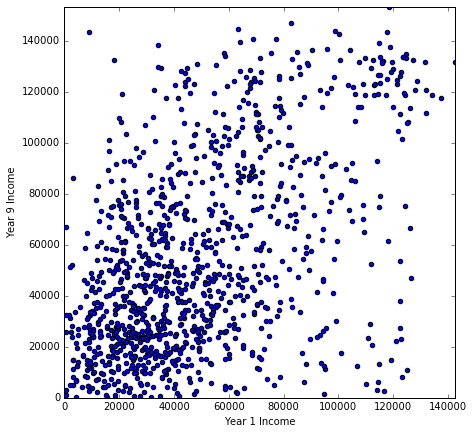

In [38]:
# Let's find all the rows that are not NaN and positive for cm1age and cf1age.
income_yr1_3 = data_frame[["f2l1", "f3l1"]]
income_yr1_3 = helper.remove_nan(income_yr1_3)
income_yr1_3 = helper.select_above_zero(income_yr1_3)
helper.scatterplot(income_yr1_3.f2l1, income_yr1_3.f3l1, xlabel = "Year 1 Income", ylabel = "Year 3 Income")

# Let's find all the rows that are not NaN and positive for cm1age and cf1age.
income_yr1_9 = data_frame[["f2l1", "m5j1"]]
income_yr1_9 = helper.remove_nan(income_yr1_9)
income_yr1_9 = helper.select_above_zero(income_yr1_9)
helper.scatterplot(income_yr1_9.f2l1, income_yr1_9.m5j1, xlabel = "Year 1 Income", ylabel = "Year 9 Income")

We can observe that Year 1 income and Year 3 income data points are concentrated along the diagonal, while  Year 1 income and Year 3 income data points are not. 
### Question: How do you interpret these two plots? What's different between them?
### Answer:

## Correlation

If you look at the plots above, you will see that there seems to be a relationship between the Incomes in consecutive years.

Correlation is a statistical technique that can show whether and how strongly pairs of variables are related. A positive correlation means that as you increase one of the variables, you would expect the second variable to increase too. A negative correlation means that as you increase one of the variables, you would expect the second variable to decrease.

We see that we have a positive correlation between the age of the mother and the father. We can compute the correlation by using the numpy corrcoef function which computes the Pearson correlation coefficient. The result is a number that lies between -1 and 1. -1 means that the variables are very strongly correlated in a negative way, 1 means that the variables are very strongly related in a positive way, and 0 means that the variables are not correlated with each other.

Note that the Pearson correlation is a linear correlation measure (only tells you about whether a line in a scatter plot captures the relationship between the variables) and does not provide information on any nonlinear relationship there might exist between the two variables.

In [42]:
# corrcoef returns what is known as the Pearson product-moment correlation coefficients. The correlation between the two
# variables is equal to the non-diagonal entries of the array.
Pearson_corr = np.corrcoef(income_yr1_3.f2l1, income_yr1_3.f3l1)
income_corr = Pearson_corr[0,1] # or equivalently Pearson_corr[1,0]
print("Correlation between Incomes in Years 1 and 3: {0}".format(income_corr))

Pearson_corr = np.corrcoef(income_yr1_9.f2l1, income_yr1_9.m5j1)
income_corr = Pearson_corr[0,1] # or equivalently Pearson_corr[1,0]
print("Correlation between Incomes in Years 1 and 9: {0}".format(income_corr))

Correlation between Incomes in Years 1 and 3: 0.7136573372062927
Correlation between Incomes in Years 1 and 9: 0.5096961085453295


### Question:  Interpret the different correlation values. What do they mean about the relationships between incomes in different years?
### Answer: